# PMR3508 Aprendizado de Máquina e Reconhecimento de Padrões
                                      Bases Adult - Técnicas de Classificação

* Autor: PMR3508-2019-42

Imports necessários:

In [1]:
# Manipulação dos dados
import pandas as pd
import numpy as np

# Visualização 
import matplotlib.pyplot as plt
import os
import time
%matplotlib inline

# Processamento
import sklearn
from sklearn import preprocessing as prep

# Classificadores
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

# Avaliação
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 1. Classificador kNN - Trabalho 1

In [2]:
os.listdir("../Adult/UCI")

['adult.data', 'adult.test']

### 1.1 Entendendo os dados

In [3]:
adult = pd.read_csv("../Adult/UCI/adult.data",
        names = [
            "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
            "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
            "Hours per week", "Country", "Target"],
        sep= r'\s*,\s*',
        engine= 'python',
        na_values= "?")

adult.shape

(32561, 15)

In [4]:
adult.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### 1.11 Análise das features mais relevantes

In [5]:
adult.describe()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


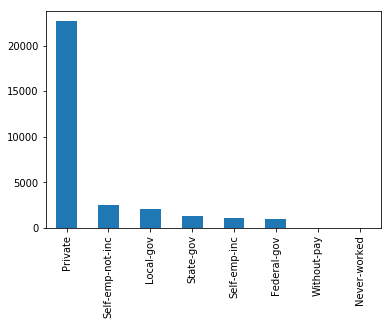

In [6]:
adult["Workclass"].value_counts().plot(kind = "bar")

In [7]:
adult["Martial Status"].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: Martial Status, dtype: int64

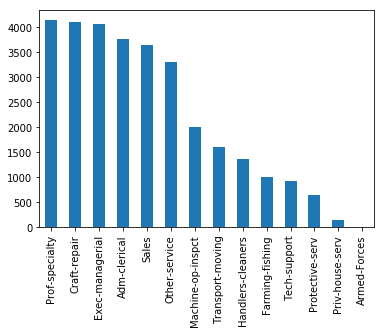

In [8]:
adult["Occupation"].value_counts().plot(kind = 'bar')

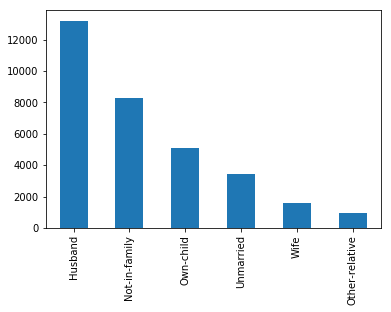

In [9]:
adult["Relationship"].value_counts().plot(kind = 'bar')

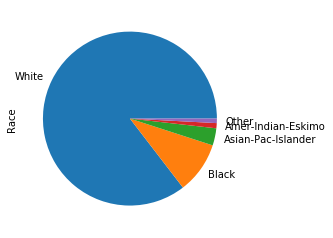

In [10]:
adult["Race"].value_counts().plot(kind = 'pie')

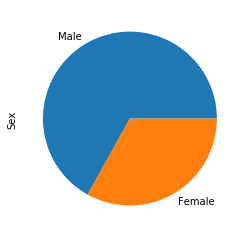

In [11]:
adult["Sex"].value_counts().plot(kind = 'pie')

In [12]:
adult["Country"].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

Conclusões

* Na feature "Country" predomina USA, logo, é descartável

* "Education" descartável, pois há "Education-Num"

* "fnlwgt" será descartado, pois não é relevante para a predição

#### 1.12 Análise dos dados faltantes

In [13]:
adult.isnull().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education-Num        0
Martial Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours per week       0
Country            583
Target               0
dtype: int64

As features 'Workclass', 'Occupation' e 'Country' concentram os dados faltantes

* Estratégia: inserir a moda da feature no lugar dos dados faltantes

In [14]:
moda = adult['Workclass'].describe().top
adult['Workclass'] = adult['Workclass'].fillna(moda)

moda = adult['Occupation'].describe().top
adult['Occupation'] = adult['Occupation'].fillna(moda)

moda = adult['Country'].describe().top
adult['Country'] = adult['Country'].fillna(moda)

adult.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-Num     0
Martial Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours per week    0
Country           0
Target            0
dtype: int64

#### 1.13 Dados de Teste

In [15]:
testAdult = pd.read_csv("../Adult/UCI/adult.test",
            names = [
            "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
            "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
            "Hours per week", "Country", "Target"],
        sep= r'\s*,\s*',
        engine= 'python',
        na_values= "?").drop(0, axis = 0).reset_index(drop = True)

testAdult.shape

(16281, 15)

In [16]:
testAdult.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [17]:
testAdult.isnull().sum()

Age                 0
Workclass         963
fnlwgt              0
Education           0
Education-Num       0
Martial Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Capital Gain        0
Capital Loss        0
Hours per week      0
Country           274
Target              0
dtype: int64

A estratégia de tratamento de dados faltantes será a mesma que foi aplicada aos dados de treino.
Como a feature "fnlwgt" não é relevante, somente a feature "Relationship" será tratada. Em "Target" a exclusão das linhas é mais conveniente.

In [18]:
moda = testAdult['Workclass'].describe().top
testAdult['Workclass'] = testAdult['Workclass'].fillna(moda)

moda = testAdult['Occupation'].describe().top
testAdult['Occupation'] = testAdult['Occupation'].fillna(moda)

moda = testAdult['Country'].describe().top
testAdult['Country'] = testAdult['Country'].fillna(moda)

testAdult.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-Num     0
Martial Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours per week    0
Country           0
Target            0
dtype: int64

In [19]:
adult.describe()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [20]:
testAdult.describe()

,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
count,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


#### 1.14 Transformação dos dados não-numéricos em valores numéricos

In [21]:
# Não Numéricos relevantes
nNumber = ["Workclass", "Occupation", "Race", "Target"]

adult[nNumber] = adult[nNumber].apply(prep.LabelEncoder().fit_transform)

testAdult[nNumber] = testAdult[nNumber].apply(prep.LabelEncoder().fit_transform)

In [22]:
adult.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,6,77516,Bachelors,13,Never-married,0,Not-in-family,4,Male,2174,0,40,United-States,0
1,50,5,83311,Bachelors,13,Married-civ-spouse,3,Husband,4,Male,0,0,13,United-States,0
2,38,3,215646,HS-grad,9,Divorced,5,Not-in-family,4,Male,0,0,40,United-States,0
3,53,3,234721,11th,7,Married-civ-spouse,5,Husband,2,Male,0,0,40,United-States,0
4,28,3,338409,Bachelors,13,Married-civ-spouse,9,Wife,2,Female,0,0,40,Cuba,0


### 1.2 Classificador k-NN

* Primeiro Teste: k = 5 usando somente dados númericos

In [25]:
atributos = ["Age", "Education-Num", "Capital Gain", "Capital Loss", "Hours per week"]

x_train = adult[atributos]
y_train = adult.Target

x_test = testAdult[atributos]
y_test = testAdult.Target

In [48]:
knn = KNeighborsClassifier(n_neighbors = 5)

scores = cross_val_score(knn, x_train, y_train, cv=10)
scores.mean()

0.8204600901177506

In [49]:
knn.fit(x_train, y_train)

y_predict = knn.predict(x_test)

accuracy_score(y_test, y_predict)

0.8241508506848474

* Segundo Teste: k = 25 usando somente dados númericos

In [50]:
knn = KNeighborsClassifier(n_neighbors = 25)

scores = cross_val_score(knn, x_train, y_train, cv=10)
scores.mean()

0.8349559802775953

In [51]:
knn.fit(x_train, y_train)

y_predict = knn.predict(x_test)

accuracy_score(y_test, y_predict)

0.8389533812419384

* Terceiro Teste: k = 25 usando dados númericos e não numéricos

In [26]:
atributos = ["Age", "Workclass", "Education-Num", "Occupation", "Race", "Capital Gain", "Capital Loss", "Hours per week"]

x_train = adult[atributos]
y_train = adult.Target

x_test = testAdult[atributos]
y_test = testAdult.Target

In [53]:
knn = KNeighborsClassifier(n_neighbors = 25)

scores = cross_val_score(knn, x_train, y_train, cv=10)
scores.mean()

0.8381501589092931

In [54]:
knn.fit(x_train, y_train)

y_predict = knn.predict(x_test)

accuracy_score(y_test, y_predict)

0.8394447515508875

Pelos resultados é perceptível que a mescla de atributos numéricos com não numéricos apresentou melhor resultado. Agora deve-se encontrar o melhor hiperparâmetro k

#### 1.21 Treinamento e Validação Cruzada para encontrar o melhor hiperparâmetro k

In [55]:
    inf = 1
    sup = 35

    scores_media = []
    aux = 0
    k_max = 0

    i = 0
    for k in range(inf, sup):
        knn = KNeighborsClassifier(n_neighbors = k)
        scores = cross_val_score(knn, x_train, y_train, cv=10)
        scores_media.append(scores.mean())

        if scores_media[i] > aux:
            k_max = k
            aux = scores_media[i]

        i = i + 1

    print(k_max)

28


Text(0.5, 1.0, 'Perfomance do algoritmo conforme o valor de k')

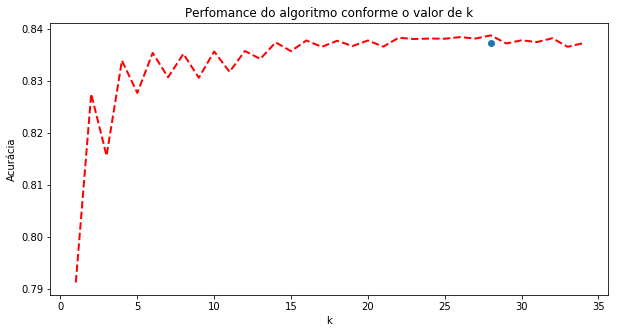

In [56]:
x = np.arange(1, sup)

plt.figure(figsize=(10, 5))
plt.plot(x, scores_media, '--', color = 'red', linewidth = 2)
plt.plot(k_max, scores_media[k_max], 'o')

plt.xlabel('k')
plt.ylabel('Acurácia')
plt.title('Perfomance do algoritmo conforme o valor de k')

In [57]:
print('Acurácia para k = {0} : {1:2.2f}%'.format(k_max, 100 * scores_media[k_max]))

Acurácia para k = 28 : 83.72%


No gráfico acima pode-se observar a acurácia obtida através da validação cruzada conforme o valor de k.

#### 1.22 Teste com o melhor hiperparâmetro

In [62]:
k = k_max

In [63]:
# Início da contagem
start = time.time()

knn = KNeighborsClassifier(n_neighbors = k)

knn.fit(x_train, y_train)

# Término da contagem
end = time.time()

In [64]:
time_knn = end - start
print ("[knn] Tempo necessário em segundos:", time_knn)

[knn] Tempo necessário em segundos: 1.070173740386963


In [65]:
predict_knn = knn.predict(x_test)

print(confusion_matrix(y_test, predict_knn))
print(classification_report(y_test, predict_knn))

acc_knn = accuracy_score(y_test, predict_knn)
print('Accuracy: ', acc_knn)

[[11849   586]
 [ 1994  1852]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     12435
           1       0.76      0.48      0.59      3846

   micro avg       0.84      0.84      0.84     16281
   macro avg       0.81      0.72      0.75     16281
weighted avg       0.83      0.84      0.83     16281

Accuracy:  0.8415330753639212


## 2. Outros Classificadores

Imports necessários

In [24]:
# Numéricos e Não Numéricos
atributos = ["Age", "Workclass", "Education-Num", "Occupation", "Race", "Capital Gain", "Capital Loss", "Hours per week"]

x_train = adult[atributos]
y_train = adult['Target']

x_test = testAdult[atributos]
y_test = testAdult['Target']

### 2.1 Regressão Logística

O otimizador que melhor se saiu em termos de acurácia foi o 'newton-cg', apesar de ter apresentado problema na convergência do algoritmo

In [67]:
# Início da contagem
start = time.time()

lr = LogisticRegression(penalty = 'l2', solver = 'newton-cg')

lr_scores = cross_val_score(lr, x_train, y_train, cv=10)

lr.fit(x_train, y_train)

# Término da contagem
end = time.time()

C:\Users\higor\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:422: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\higor\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\higor\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\higor\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:422: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\higor\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\higor\Anaconda3\lib\site-packages\sklearn\utils\optimize.py

In [68]:
time_lr = end - start

print ("[LR] Tempo Necessário em segundos:", time_lr)
lr_scores

[LR] Tempo Necessário em segundos: 9.675126314163208


array([0.81056187, 0.81234644, 0.81357494, 0.81265356, 0.81081081,
       0.81633907, 0.81265356, 0.8227887 , 0.82217445, 0.81664619])

In [69]:
predict_lr = lr.predict(x_test)

print(confusion_matrix(y_test, predict_lr))
print(classification_report(y_test, predict_lr))

acc_lr = accuracy_score(y_test, predict_lr)
print('Accuracy: ', acc_lr)

[[11746   689]
 [ 2335  1511]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.89     12435
           1       0.69      0.39      0.50      3846

   micro avg       0.81      0.81      0.81     16281
   macro avg       0.76      0.67      0.69     16281
weighted avg       0.80      0.81      0.79     16281

Accuracy:  0.814262023217247


### 2.2 Random Forest

Comentários

In [70]:
# Início da contagem
start = time.time()

rf = RandomForestClassifier(n_estimators = 700, max_depth = 12)

rf_scores = cross_val_score(rf, x_train, y_train, cv=10)

rf.fit(x_train, y_train)

# Término da contagem
end = time.time()

In [71]:
time_rf = end - start

print ("[RF] Tempo Necessário em segundos:", time_rf)
rf_scores

[RF] Tempo Necessário em segundos: 98.09270143508911


array([0.83604544, 0.8470516 , 0.84244472, 0.83599509, 0.84029484,
       0.84213759, 0.83814496, 0.85135135, 0.84336609, 0.83968059])

In [72]:
predict_rf = rf.predict(x_test)

print(confusion_matrix(y_test, predict_rf))
print(classification_report(y_test, predict_rf))

acc_rf = accuracy_score(y_test, predict_rf)
print('Accuracy: ', acc_rf)

[[11989   446]
 [ 2150  1696]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     12435
           1       0.79      0.44      0.57      3846

   micro avg       0.84      0.84      0.84     16281
   macro avg       0.82      0.70      0.73     16281
weighted avg       0.83      0.84      0.82     16281

Accuracy:  0.8405503347460229


### 2.3 Suport Vector Machine

In [25]:
# Início da contagem
start = time.time()

svm = SVC(gamma = 'scale', kernel = 'rbf')

svm_scores = cross_val_score(svm, x_train, y_train, cv=10)

svm.fit(x_train,y_train)

# Término da contagem
end = time.time()

In [27]:
time_svm = end-start

print ("[SVM] Tempo Necessário em segundos:", time_svm)
svm_scores

[SVM] Tempo Necessário em segundos: 192.91407680511475


array([0.79766656, 0.80835381, 0.79914005, 0.80497543, 0.80067568,
       0.80405405, 0.79238329, 0.80681818, 0.80067568, 0.80866093])

In [28]:
predict_svm = svm.predict(x_test)

print(confusion_matrix(y_test, predict_svm))
print(classification_report(y_test, predict_svm))

acc_svm = accuracy_score(y_test, predict_svm)
print('Accuracy: ', acc_svm)

[[12031   404]
 [ 2813  1033]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88     12435
           1       0.72      0.27      0.39      3846

   micro avg       0.80      0.80      0.80     16281
   macro avg       0.76      0.62      0.64     16281
weighted avg       0.79      0.80      0.77     16281

Accuracy:  0.8024077145138505


### 2.4 AdaBoost

O algoritmo mais famoso de Boosting é o AdaBoost e também foi apresentado na disciplina PMR3508, logo, é interessante visualizar sua perfomance para o problema em questão.

In [76]:
# Início da contagem
start = time.time()

boost = AdaBoostClassifier(n_estimators=100)

boost_scores = cross_val_score(boost, x_train, y_train, cv=10)

boost.fit(x_train,y_train)

# Término da contagem
end = time.time()

In [77]:
time_boost = end-start

print ("[AdaBoost] Tempo Necessário em segundos:", time_boost)
boost_scores

[AdaBoost] Tempo Necessário em segundos: 13.797103881835938


array([0.83788763, 0.84520885, 0.84121622, 0.83630221, 0.84090909,
       0.84551597, 0.84090909, 0.8495086 , 0.84613022, 0.84305897])

In [86]:
predict_boost = boost.predict(x_test)

print(confusion_matrix(y_test, predict_boost))
print(classification_report(y_test, predict_boost))

acc_boost = accuracy_score(y_test, predict_boost)
print('Accuracy: ', acc_boost)

[[11864   571]
 [ 2046  1800]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     12435
           1       0.76      0.47      0.58      3846

   micro avg       0.84      0.84      0.84     16281
   macro avg       0.81      0.71      0.74     16281
weighted avg       0.83      0.84      0.82     16281

Accuracy:  0.8392604876850316


### 2.5 Multilayer Perceptron (MLP)

A biblioteca sklearn possui um módulo que nos permite usar um modelo de Rede Neural simples, mais precisamente uma MLP, que é tratado como uma caixa preta, um dos motivos pelo qual a biblioteca não está entre as mais utilizadas para esse fim.

In [25]:
# Início da contagem
start = time.time()

mlp = MLPClassifier(activation = 'relu', 
                    solver = 'adam')

mlp_scores = cross_val_score(mlp, x_train, y_train, cv=10)

mlp.fit(x_train,y_train)

# Término da contagem
end = time.time()

In [26]:
time_mlp = end-start

print ("[MLP] Time elapsed:", time_mlp)
mlp_scores

[MLP] Time elapsed: 62.682419538497925


array([0.8099478 , 0.80651106, 0.81818182, 0.81203931, 0.79576167,
       0.81541769, 0.8034398 , 0.81019656, 0.81111794, 0.8240172 ])

In [81]:
predict_mlp = mlp.predict(x_test)

print(confusion_matrix(y_test, predict_mlp))
print(classification_report(y_test, predict_mlp))

acc_mlp = accuracy_score(y_test, predict_mlp)
print('Accuracy: ', acc_mlp)

[[11789   646]
 [ 2369  1477]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89     12435
           1       0.70      0.38      0.49      3846

   micro avg       0.81      0.81      0.81     16281
   macro avg       0.76      0.67      0.69     16281
weighted avg       0.80      0.81      0.79     16281

Accuracy:  0.8148148148148148


## 3. Análise dos Resultados e Conclusões

### 3.1 Acurácia

In [87]:
classificadores = ['kNN', 'Logistic Regression', 'Random Forest', 'SVM', 'AdaBoost', 'MLP']

acc = [acc_knn, acc_lr, acc_rf, acc_svm, acc_boost, acc_mlp]

Text(0.5, 1.0, 'Perfomance do Classificador')

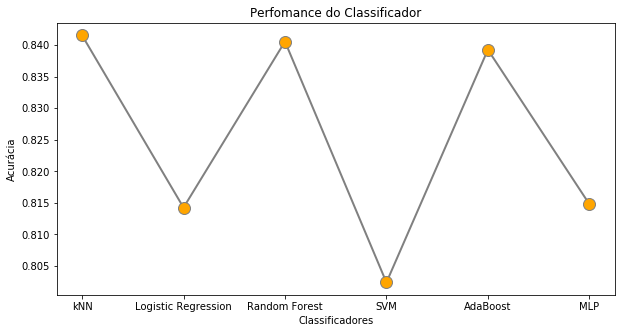

In [88]:
plt.figure(figsize=(10, 5))
plt.plot(classificadores, acc, color = 'grey', linewidth = 2, marker = 'o', markersize = 12, markerfacecolor = 'orange')

plt.xlabel('Classificadores')
plt.ylabel('Acurácia')
plt.title('Perfomance do Classificador')

### 3.2 Tempo de Processamento

In [90]:
time = [time_knn, time_lr, time_rf, time_svm, time_boost, time_mlp]

Text(0.5, 1.0, 'Tempo de Processamento para cada Classificador')

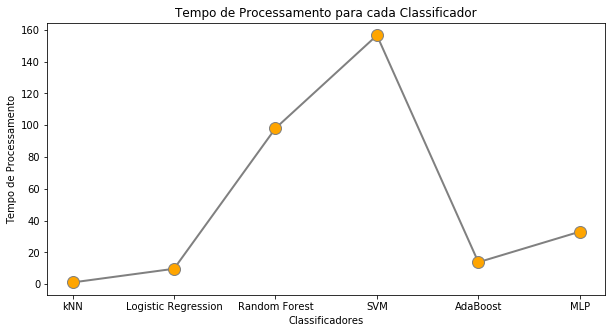

In [92]:
plt.figure(figsize=(10, 5))
plt.plot(classificadores, time, color = 'grey', linewidth = 2, marker = 'o', markersize = 12, markerfacecolor = 'orange')

plt.xlabel('Classificadores')
plt.ylabel('Tempo de Processamento')
plt.title('Tempo de Processamento para cada Classificador')

### 3.3 Análise dos Classificadores

A seguir segue uma análise geral de cada classificador acerca dos resultados obtidos, tendo como destaque a dificuldade de gerar o classificador, interpretabilidade, tempo de processamento no treinamento e desempenho nas métricas utilizadas.

O primeiro classificador testado foi o **K-Nearest Neighbors (kNN)**, sendo o primeiro classificador estudado na disciplina PMR3508 e que fez parte do 1º Trabalho atuando justamente sobre o Dataset Adult. Dentre os classificadores utilizados foi aquele que apresentou menor tempo de processamento devido a sua simplicidade, além da melhor acurácia, uma vez que apresenta apenas um principal hiperparâmetro (número de vizinhos - k), logo, por validação cruzada é muito simples de encontrar o melhor hiperâmetro que maximiza a acurácia. Em termos de interpretabilidade é facilmente compreendido, uma vez que o conceito por trás é bem simplório, apesar de eficiente.

Em seguida foi utilizado a **Regressão Logística**, técnica bem famosa da família das regressões e que teoricamente se encaixa bem ao problema em questão, uma vez que trabalha com variável dependente categórica. Apresentou pequeno tempo de processamento sendo o segundo mais rápido, porém com acurácia baixa. Sua interpretabilidade é fácil, uma vez que apresenta o conceito de regressão, ou seja, a atribuição de maiores pesos às variáveis independentes (features) mais relevantes para a classificação.

O terceiro algoritmo utilizado foi o **Random Forest** (Floresta Aleatória), sendo este mais complexo que os citamos anteriormente, o que também explica o maior tempo de processamento no treinamento, além de ter apresentado uma acurácia bem interessante. Tal algoritmo é baseado no conceito de Árvores de Decisão, uma vez que que várias árvores são utilizadas para fazer a classificação e a média delas é computada para se tomar a decisão. Apesar da construção do Random Forest envolver uma composição de árvores e que para cada árvore são escolhidos atributos aleatórios, a interpretabilidade ainda é um dos pontos de destaque, pois a Árvore de Decisão em si é fácil de entender e a Floresta Aleatória leva em consideração a maioria das escolhas de suas árvores. 

O quarto algoritmo utilizado foi o **Suport Vector Machine** (SVM). No geral foi o pior classificador tanto em tempo de processamento no treinamento quanto na acurácia. Por se tratar de um dos algoritmos mais complexos testados, sua interpretabilidade é ruim, principalmente levando em consideração a atuação do Kernel, isto é, hiperparâmetro que permite tonrar o SVM mais efetivo para espaços de maior dimensão utilizando funções envolvendo os atributos.

Em seguida foi utilizado um famoso algoritmo de Boosting, o **AdaBoost**. Dentre todos os classificadores utilizados foi aquele com melhor desempenho, levando em consideração o tempo de processamento no treinamento e a acurácia. Seu funcionamento se baseia na utilização de classificadores simples para determinadas amostras do dataset, sendo que apresentam um comportamento sequencial, isto é, as classificações são realizadas sequencialmente e sempre levando em consideração o que já foi feito anteriormente, sendo uma forma de se adequar aos erros. A ideia em si é simples, mas em termos de interpretabilidade não.

Por último procurou-se utilizar uma rede neural básica chamada **Multilayer Perceptron** (MLP). Sua interpretabilidade é ruim, porém apresentou resultados interessantes tanto em tempo de processamento quanto em acurácia. A dificuldade na criação do classificador é o principal detalhe a ser destacado, uma vez que há muitos hiperparâmetros e a escolha sábia deles é fundamental para um bom resultado

## 4. Base CaliforniaHousing - Extra

In [1]:
# Manipulação dos dados
import pandas as pd
import numpy as np

# Visualização 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
%matplotlib inline

# Estatística
import scipy
from scipy import stats

# Regressores
import sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn import tree

# Avaliação
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

In [2]:
os.listdir("../CaliforniaHousing/Kaggle")

['sample_sub_1.csv',
 'test.csv',
 'test_features.csv',
 'train.csv',
 'training_data.csv']

### 4.1 Entendendo os Dados

In [3]:
data = pd.read_csv("../CaliforniaHousing/Kaggle/train.csv", na_values= "?")

data.head()

,Id,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,15817,-120.85,37.57,27,819,157,451,150,34934,193800
1,6236,-117.74,34.06,48,2438,599,1508,548,28983,129200
2,19262,-118.11,33.92,32,1016,190,729,177,43000,151300
3,19743,-118.12,34.15,35,1760,447,984,384,34167,198200
4,7272,-120.63,37.41,27,2083,444,1462,479,26439,69100


In [4]:
data.describe()

,Id,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,10277.163621,-119.563050,35.625804,28.700028,2622.627284,535.628391,1413.978405,496.934109,38747.577450,207556.603267
std,5956.576981,2.008096,2.138690,12.587508,2145.423570,416.800426,1095.060629,376.873380,19091.513037,116441.436255
min,0.000000,-124.350000,32.550000,1.000000,2.000000,2.000000,3.000000,2.000000,4999.000000,14999.000000
25%,5124.750000,-121.790000,33.930000,18.000000,1444.000000,295.000000,784.000000,279.000000,25596.500000,119300.000000
50%,10254.500000,-118.490000,34.250000,29.000000,2116.000000,432.000000,1160.000000,407.000000,35334.000000,179950.000000
75%,15413.750000,-118.000000,37.710000,37.000000,3131.250000,645.250000,1705.000000,602.000000,47500.000000,266100.000000
max,20639.000000,-114.470000,41.950000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,150001.000000,500001.000000


In [5]:
data.shape

(14448, 10)

Dataset de Teste

In [6]:
test = pd.read_csv("../CaliforniaHousing/Kaggle/test.csv", na_values= "?")

test.head()

,Id,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income
0,8609,-118.67,34.30,5,6123,825,2440,736,79013
1,14610,-117.66,34.09,26,1151,200,593,188,36667
2,1557,-118.93,35.37,34,2412,446,1558,421,26903
3,12875,-117.23,34.14,16,2577,521,956,472,25625
4,17821,-121.06,38.98,14,2267,355,1140,369,47019


In [7]:
test.shape

(6192, 9)

Análise dos dados faltantes

In [8]:
data.isnull().sum()

Id                    0
longitude             0
latitude              0
median_age            0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [9]:
test.isnull().sum()

Id                0
longitude         0
latitude          0
median_age        0
total_rooms       0
total_bedrooms    0
population        0
households        0
median_income     0
dtype: int64

Mapa de Calor

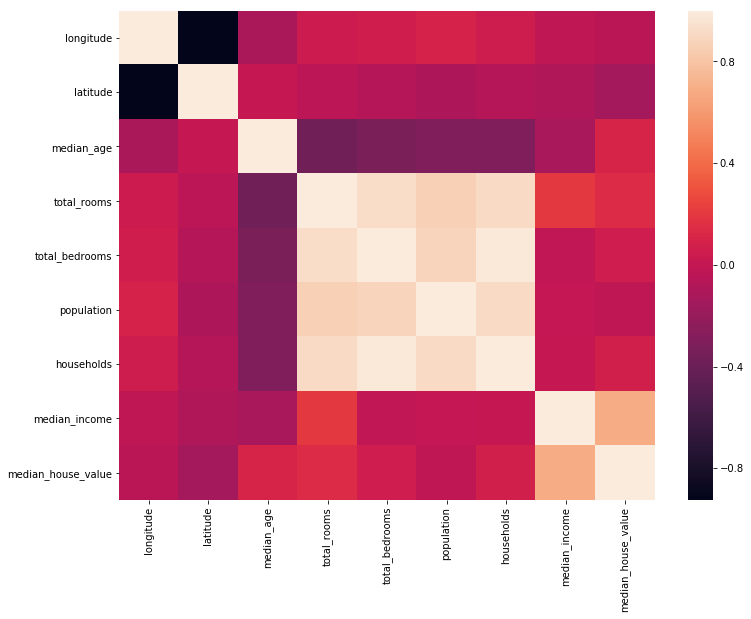

In [10]:
aux = data.drop('Id', axis = 1).corr()
plt.figure(figsize=(12,9))
sns.heatmap(aux)

Coeficiente de Person entre as features e o atributo Target

In [11]:
data_aux = data.drop('Id', axis = 1)

In [12]:
correlation = []
param = []

for i in data_aux.columns:
    if i != 'median_house_value':
        corr = stats.pearsonr(data_aux[i], data_aux['median_house_value'])[0]
        correlation.append(corr)
        param.append(i)
    
    

In [14]:
dados = pd.DataFrame({'Correlação': correlation, 'Parâmetros': param})
dados = dados.set_index('Parâmetros')

dados

,Correlação
Parâmetros,
longitude,-0.044062
latitude,-0.147024
median_age,0.099341
total_rooms,0.139242
total_bedrooms,0.055533
population,-0.020434
households,0.071622
median_income,0.687604


A partir do Mapa de Calor e do Coeficiente de Correlação de Person, conclui-se que os atributos/features mais relevantes para a regressão são:

- latitude
- median_age
- total_rooms
- median_income

In [15]:
features = ['latitude', 'median_age', 'total_rooms', 'median_income']

### 4.2 Treino dos Regressores

Serão testados os seguintes regressores:

- Regressão Linear
- kNN Regressor
- Árvore de Decisão

In [16]:
x_train = data[features]
y_train = data['median_house_value']

x_test = test[features]

#### 4.21 Regressão Linear

In [28]:
rl = LinearRegression(normalize = 'True')

rl_scores = cross_val_score(rl, x_train, y_train, cv=10)

rl.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize='True')

In [29]:
rl_scores.mean()

0.5200726387718683

Predição a partir da Regressão Linear criada

In [30]:
y_test = rl.predict(x_test)

y_test

array([351314.74714369, 194808.37859574, 168509.50024169, ...,
       209750.23652931, 207508.85916158, 112603.80933251])

In [72]:
data_y = pd.DataFrame(y_test, columns = ['Preço Médio Esperado'])

rl_predict = pd.concat([x_test, data_y], axis=1)

rl_predict.head()

,latitude,median_age,total_rooms,median_income,Preço Médio Esperado
0,34.30,5,6123,79013,351314.747144
1,34.09,26,1151,36667,194808.378596
2,35.37,34,2412,26903,168509.500242
3,34.14,16,2577,25625,133973.632809
4,38.98,14,2267,47019,195254.650253


Coeficiente de Determinação (R^2) da predição

In [31]:
rl.score(x_train, y_train)

0.521051269727165

#### 4.22 kNN Regressor

In [75]:
knn_reg = KNeighborsRegressor(n_neighbors = 30)

knn_reg_scores = cross_val_score(knn_reg, x_train, y_train, cv=10)

knn_reg.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=30, p=2,
          weights='uniform')

In [76]:
knn_reg_scores.mean()

0.47567147819834377

Predição

In [77]:
y_test = knn_reg.predict(x_test)

y_test

array([414296.83333333, 211356.7       , 147263.33333333, ...,
       258310.03333333, 232306.66666667, 156643.33333333])

In [79]:
data_y = pd.DataFrame(y_test, columns = ['Preço Médio Esperado'])

knn_predict = pd.concat([x_test, data_y], axis=1)

knn_predict.head()

,latitude,median_age,total_rooms,median_income,Preço Médio Esperado
0,34.30,5,6123,79013,414296.833333
1,34.09,26,1151,36667,211356.700000
2,35.37,34,2412,26903,147263.333333
3,34.14,16,2577,25625,123713.333333
4,38.98,14,2267,47019,279033.433333


#### 4.21 Árvore de Decisão

In [81]:
arvore = tree.DecisionTreeRegressor()

arvore_scores = cross_val_score(knn_reg, x_train, y_train, cv=10)

arvore.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [82]:
arvore_scores.mean()

0.47567147819834377

Predição

In [84]:
y_test = arvore.predict(x_test)

y_test

array([452100., 191900.,  72300., ..., 156500., 285200., 119500.])

In [85]:
data_y = pd.DataFrame(y_test, columns = ['Preço Médio Esperado'])

arvore_predict = pd.concat([x_test, data_y], axis=1)

arvore_predict.head()

,latitude,median_age,total_rooms,median_income,Preço Médio Esperado
0,34.30,5,6123,79013,452100.0
1,34.09,26,1151,36667,191900.0
2,35.37,34,2412,26903,72300.0
3,34.14,16,2577,25625,146900.0
4,38.98,14,2267,47019,212000.0
